# DQL agent running on the Active Directory sample environment

In [77]:
from cyberbattle.simulation.model import *
import logging, sys, gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import ActionTrackingStateAugmentation, AgentWrapper, Verbosity
logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline 

In [78]:
ngyms = 9
gymids = [f"ActiveDirectory-v{i}" for i in range(0, ngyms)]
iteration_count = 1000

In [79]:
envs = [gym.make(gymid) for gymid in gymids]
map(lambda g : g.seed(1), envs)
ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=30,
    maximum_total_credentials=50,
    identifiers=envs[0].identifiers
)


In [80]:
# Evaluate the Deep Q-learning agent for each env using transfer learning
l = dqla.DeepQLearnerPolicy(
    ep=ep,
    gamma=0.015,
    replay_memory_size=10000,
    target_update=5,
    batch_size=512,
    learning_rate=0.01  # torch default learning rate is 1e-2
)
for (i, env) in enumerate(envs):
    epsilon = (10 - i) / 10
    # at least 1 runs and max 10 for the 10 envs
    training_episode_count = 1 + (9 - i)
    dqn_learning_run = learner.epsilon_greedy_search(
        cyberbattle_gym_env=env,
        environment_properties=ep,
        learner=l,
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=epsilon,
        epsilon_exponential_decay=50000,
        epsilon_minimum=0.1,
        verbosity=Verbosity.Quiet,
        render=False,
        plot_episodes_length=False,
        title=f"DQL {i}"
    )
    l = dqn_learning_run["learner"]


###### DQL 0
Learning with: episode_count=10,iteration_count=1000,ϵ=1.0,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/10 'DQL 0' ϵ=1.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   30.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 38|reward:   30.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 47|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 47|reward:   31.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 51|reward:   37.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 51|reward:   37.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 1

  Episode 1 stopped at t=1000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/269 (0.06)
    explore-remote: 0/355 (0.00)
    explore-connect: 4/345 (0.01)
    exploit-local: 0/9 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'DQL 0' ϵ=0.9822, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 11|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 14|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 20|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|It

  Episode 2 stopped at t=1000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 26/224 (0.10)
    explore-remote: 0/378 (0.00)
    explore-connect: 7/337 (0.02)
    exploit-local: 6/21 (0.22)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'DQL 0' ϵ=0.9647, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 13|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 13|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|It

  Episode 3 stopped at t=1000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/269 (0.06)
    explore-remote: 0/354 (0.00)
    explore-connect: 2/314 (0.01)
    exploit-local: 2/10 (0.17)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/28 (0.10)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'DQL 0' ϵ=0.9476, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iteration 10|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iteration 12|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 4|Iter

  Episode 4 stopped at t=1000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/234 (0.08)
    explore-remote: 0/354 (0.00)
    explore-connect: 4/341 (0.01)
    exploit-local: 12/8 (0.60)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'DQL 0' ϵ=0.9308, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   25.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   25.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:   34.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:   34.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   34.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:   34.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Itera

  Episode 5 ended at t=905 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/191 (0.06)
    explore-remote: 0/327 (0.00)
    explore-connect: 4/305 (0.01)
    exploit-local: 16/17 (0.48)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/28 (0.15)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'DQL 0' ϵ=0.9159, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Itera

  Episode 6 ended at t=488 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/106 (0.15)
    explore-remote: 0/166 (0.00)
    explore-connect: 4/161 (0.02)
    exploit-local: 13/4 (0.76)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'DQL 0' ϵ=0.9080, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   24.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   30.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 9|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:01||
Episode 7|Iteration 13|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:01||
Episode 7|Iter

  Episode 7 ended at t=863 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/197 (0.06)
    explore-remote: 0/272 (0.00)
    explore-connect: 6/289 (0.02)
    exploit-local: 20/19 (0.51)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/44 (0.06)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'DQL 0' ϵ=0.8942, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   18.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:   24.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:   24.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 10|reward:   24.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 12|reward:   24.0|last_reward_at:    8|Elapsed Time: 0:00:01||
Episode 8|Iter

  Episode 8 ended at t=898 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/192 (0.05)
    explore-remote: 0/279 (0.00)
    explore-connect: 3/303 (0.01)
    exploit-local: 21/6 (0.78)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/78 (0.07)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'DQL 0' ϵ=0.8800, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   30.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   30.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iterat

  Episode 9 stopped at t=1000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/218 (0.08)
    explore-remote: 0/320 (0.00)
    explore-connect: 2/325 (0.01)
    exploit-local: 14/12 (0.54)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/84 (0.07)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'DQL 0' ϵ=0.8646, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 12|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 12|reward:    6.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 10|Iteration 13|reward:   12.0|last_reward_at:   12|Elapsed Time: 0:00:01||
Episode 10|Iteration 13|reward:   12.0|last_reward_at:   13|Elapsed Time: 0:00:01||

  Episode 10 ended at t=960 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/214 (0.07)
    explore-remote: 0/325 (0.00)
    explore-connect: 2/277 (0.01)
    exploit-local: 15/16 (0.48)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/89 (0.07)
  exploit deflected to exploration: 2
simulation ended
###### DQL 1
Learning with: episode_count=9,iteration_count=1000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/9 'DQL 1' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 11|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:01||
Episode 1|Ite

  Episode 1 ended at t=545 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/114 (0.07)
    explore-remote: 0/183 (0.00)
    explore-connect: 3/178 (0.02)
    exploit-local: 15/5 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 0
  ## Episode: 2/9 'DQL 1' ϵ=0.8913, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   12.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   12.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 11|reward:   27.0|last_reward_at:    8|Elapsed Time: 0:00:01||
Episode 2|Iteration 11|reward:   27.0|last_reward_at:   11|Elapsed Time: 0:00:01||
Episode 2|Iter

  Episode 2 ended at t=681 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/160 (0.04)
    explore-remote: 0/233 (0.00)
    explore-connect: 6/193 (0.03)
    exploit-local: 19/11 (0.63)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/52 (0.02)
  exploit deflected to exploration: 0
  ## Episode: 3/9 'DQL 1' ϵ=0.8806, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Itera

  Episode 3 ended at t=421 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/80 (0.14)
    explore-remote: 0/137 (0.00)
    explore-connect: 3/143 (0.02)
    exploit-local: 14/13 (0.52)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 0
  ## Episode: 4/9 'DQL 1' ϵ=0.8741, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:    6.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:    6.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 10|reward:    6.0|last_reward_at:    6|Elapsed Time: 0:00:01||
Episode 4|Iteration 11|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:01||
Episode 4|Iteration 11|reward:   12.0|last_reward_at:   11|Elapsed Time: 0:00:01||
Episode 4|Iteration 12|reward:   12.0|last_reward_at:   11|Elapsed Time: 0:00:01||
Episode 4|It

  Episode 4 ended at t=545 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/103 (0.08)
    explore-remote: 0/176 (0.00)
    explore-connect: 2/181 (0.01)
    exploit-local: 17/15 (0.53)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/37 (0.12)
  exploit deflected to exploration: 0
  ## Episode: 5/9 'DQL 1' ϵ=0.8657, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   15.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   15.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   20.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   21.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:   21.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   27.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iterat

  Episode 5 ended at t=395 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/83 (0.14)
    explore-remote: 0/135 (0.00)
    explore-connect: 5/111 (0.04)
    exploit-local: 14/15 (0.48)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 2/16 (0.11)
  exploit deflected to exploration: 2
  ## Episode: 6/9 'DQL 1' ϵ=0.8597, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:01||
Episode 6|Iteration 12|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:01||
Episode 6|Iteration 13|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:01||
Episode 6|Iteration 13|reward:   12.0|last_reward_at:   13|Elapsed Time: 0:00:01||
Episode 6|It

  Episode 6 ended at t=414 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/88 (0.12)
    explore-remote: 0/153 (0.00)
    explore-connect: 1/111 (0.01)
    exploit-local: 15/14 (0.52)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 6/11 (0.35)
  exploit deflected to exploration: 3
  ## Episode: 7/9 'DQL 1' ϵ=0.8534, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iterat

  Episode 7 ended at t=539 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/118 (0.09)
    explore-remote: 0/170 (0.00)
    explore-connect: 2/162 (0.01)
    exploit-local: 16/17 (0.48)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/38 (0.12)
  exploit deflected to exploration: 0
  ## Episode: 8/9 'DQL 1' ϵ=0.8453, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 10|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:01||
Episode 8|Itera

  Episode 8 ended at t=261 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/42 (0.21)
    explore-remote: 0/82 (0.00)
    explore-connect: 3/84 (0.03)
    exploit-local: 15/9 (0.62)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 0
  ## Episode: 9/9 'DQL 1' ϵ=0.8415, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 11|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:01||
Episode 9|Iteration 13|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:01||
Episode 9|Iter

  Episode 9 ended at t=755 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/169 (0.05)
    explore-remote: 0/227 (0.00)
    explore-connect: 3/238 (0.01)
    exploit-local: 16/31 (0.34)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/59 (0.06)
  exploit deflected to exploration: 0
simulation ended
###### DQL 2
Learning with: episode_count=8,iteration_count=1000,ϵ=0.8,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/8 'DQL 2' ϵ=0.8000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   18.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:01||
Episode 1|Iteration 8|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:01||
Episode 1|Iteration 9|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:01||
Episode 1|Iteration 11|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:01||
Episode 1|Itera

  Episode 1 ended at t=464 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/90 (0.07)
    explore-remote: 0/156 (0.00)
    explore-connect: 4/127 (0.03)
    exploit-local: 15/24 (0.38)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/39 (0.05)
  exploit deflected to exploration: 1
  ## Episode: 2/8 'DQL 2' ϵ=0.7935, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:01||
Episode 2|Iterat

  Episode 2 ended at t=172 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/31 (0.11)
    explore-remote: 0/49 (0.00)
    explore-connect: 1/44 (0.02)
    exploit-local: 19/9 (0.68)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 3/8 'DQL 2' ϵ=0.7912, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   30.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=184 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/30 (0.14)
    explore-remote: 0/53 (0.00)
    explore-connect: 2/50 (0.04)
    exploit-local: 15/8 (0.65)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 0
  ## Episode: 4/8 'DQL 2' ϵ=0.7886, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:01||
Episode 4|Iteration 5|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:01||
Episode 4|Iteration 5|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:01||
Episode 4|Iteration 6|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:01||
Episode 4|Iteration 7|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:02||
Episode 4|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:02||
Episode 4|Iterat

  Episode 4 ended at t=191 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/35 (0.10)
    explore-remote: 0/49 (0.00)
    explore-connect: 2/63 (0.03)
    exploit-local: 16/3 (0.84)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 0
  ## Episode: 5/8 'DQL 2' ϵ=0.7860, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   18.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 15|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 15|reward:   30.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 5|It

  Episode 5 ended at t=127 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/25 (0.17)
    explore-remote: 0/36 (0.00)
    explore-connect: 1/30 (0.03)
    exploit-local: 17/3 (0.85)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 6/8 'DQL 2' ϵ=0.7843, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   37.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   37.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   43.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Itera

  Episode 6 ended at t=252 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/50 (0.12)
    explore-remote: 0/75 (0.00)
    explore-connect: 1/62 (0.02)
    exploit-local: 15/7 (0.68)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/30 (0.14)
  exploit deflected to exploration: 0
  ## Episode: 7/8 'DQL 2' ϵ=0.7808, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   18.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   24.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   24.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 9|reward:   30.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 9|reward:   30.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 7|Itera

  Episode 7 ended at t=206 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/44 (0.12)
    explore-remote: 0/57 (0.00)
    explore-connect: 0/51 (0.00)
    exploit-local: 17/8 (0.68)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/17 (0.26)
  exploit deflected to exploration: 1
  ## Episode: 8/8 'DQL 2' ϵ=0.7780, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   30.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:   30.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 11|reward:   30.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 12|reward:   35.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 12|reward:   35.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 8|Ite

  Episode 8 ended at t=417 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/89 (0.04)
    explore-remote: 0/117 (0.00)
    explore-connect: 1/104 (0.01)
    exploit-local: 19/13 (0.59)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/65 (0.07)
  exploit deflected to exploration: 0
simulation ended
###### DQL 3
Learning with: episode_count=7,iteration_count=1000,ϵ=0.7,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/7 'DQL 3' ϵ=0.7000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   30.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   37.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   37.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 ended at t=477 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/90 (0.05)
    explore-remote: 0/120 (0.00)
    explore-connect: 1/135 (0.01)
    exploit-local: 21/27 (0.44)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 6/71 (0.08)
  exploit deflected to exploration: 0
  ## Episode: 2/7 'DQL 3' ϵ=0.6943, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   18.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:01||
Episode 2|Iterat

  Episode 2 ended at t=224 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/40 (0.11)
    explore-remote: 0/63 (0.00)
    explore-connect: 1/48 (0.02)
    exploit-local: 21/17 (0.55)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/23 (0.21)
  exploit deflected to exploration: 0
  ## Episode: 3/7 'DQL 3' ϵ=0.6917, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   24.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   30.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   40.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   40.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   40.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Itera

  Episode 3 ended at t=311 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/65 (0.03)
    explore-remote: 0/82 (0.00)
    explore-connect: 2/61 (0.03)
    exploit-local: 19/18 (0.51)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/57 (0.08)
  exploit deflected to exploration: 0
  ## Episode: 4/7 'DQL 3' ϵ=0.6880, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=264 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/46 (0.12)
    explore-remote: 0/61 (0.00)
    explore-connect: 2/62 (0.03)
    exploit-local: 20/15 (0.57)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/47 (0.10)
  exploit deflected to exploration: 2
  ## Episode: 5/7 'DQL 3' ϵ=0.6849, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   18.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   24.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   24.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   30.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   37.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   37.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:   37.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iterat

  Episode 5 ended at t=104 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 0/28 (0.00)
    explore-connect: 2/21 (0.09)
    exploit-local: 23/3 (0.88)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/6 (0.45)
  exploit deflected to exploration: 0
  ## Episode: 6/7 'DQL 3' ϵ=0.6837, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   30.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   37.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   37.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 6|Iter

  Episode 6 ended at t=232 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/44 (0.10)
    explore-remote: 0/50 (0.00)
    explore-connect: 2/48 (0.04)
    exploit-local: 22/14 (0.61)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/42 (0.11)
  exploit deflected to exploration: 0
  ## Episode: 7/7 'DQL 3' ϵ=0.6810, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   24.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   24.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 9|reward:   30.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 9|reward:   30.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   30.0|last_reward_at:    9|Elapsed Time: 0:00:01||
Episode 7|Itera

  Episode 7 ended at t=184 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/26 (0.07)
    explore-remote: 0/44 (0.00)
    explore-connect: 1/55 (0.02)
    exploit-local: 23/10 (0.70)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/17 (0.26)
  exploit deflected to exploration: 0
simulation ended
###### DQL 4
Learning with: episode_count=6,iteration_count=1000,ϵ=0.6,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/6 'DQL 4' ϵ=0.6000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   27.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 11|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iter

  Episode 1 ended at t=111 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/18 (0.14)
    explore-remote: 0/27 (0.00)
    explore-connect: 1/23 (0.04)
    exploit-local: 22/7 (0.76)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/4 (0.60)
  exploit deflected to exploration: 0
  ## Episode: 2/6 'DQL 4' ϵ=0.5989, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   27.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   28.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   28.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=89 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/7 (0.42)
    explore-remote: 0/20 (0.00)
    explore-connect: 3/24 (0.11)
    exploit-local: 18/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 3/6 'DQL 4' ϵ=0.5980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   34.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Itera

  Episode 3 ended at t=312 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/50 (0.07)
    explore-remote: 0/72 (0.00)
    explore-connect: 1/58 (0.02)
    exploit-local: 21/50 (0.30)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/50 (0.11)
  exploit deflected to exploration: 1
  ## Episode: 4/6 'DQL 4' ϵ=0.5949, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   27.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   39.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   39.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   39.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=119 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/25 (0.19)
    explore-remote: 0/24 (0.00)
    explore-connect: 1/19 (0.05)
    exploit-local: 17/10 (0.63)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/11 (0.35)
  exploit deflected to exploration: 0
  ## Episode: 5/6 'DQL 4' ϵ=0.5937, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   27.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   38.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   38.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iterat

  Episode 5 ended at t=125 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/17 (0.11)
    explore-remote: 0/12 (0.00)
    explore-connect: 1/26 (0.04)
    exploit-local: 23/10 (0.70)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/28 (0.18)
  exploit deflected to exploration: 0
  ## Episode: 6/6 'DQL 4' ϵ=0.5925, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   27.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   39.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iterat

  Episode 6 ended at t=186 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/32 (0.03)
    explore-remote: 0/39 (0.00)
    explore-connect: 2/36 (0.05)
    exploit-local: 24/22 (0.52)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/25 (0.17)
  exploit deflected to exploration: 0
simulation ended
###### DQL 5
Learning with: episode_count=5,iteration_count=1000,ϵ=0.5,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/5 'DQL 5' ϵ=0.5000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   30.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   30.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 8|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   48.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   48.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 12|reward:   48.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Itera

  Episode 1 ended at t=315 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/33 (0.06)
    explore-remote: 0/59 (0.00)
    explore-connect: 1/72 (0.01)
    exploit-local: 34/31 (0.52)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/74 (0.11)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'DQL 5' ϵ=0.4975, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   30.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   30.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   36.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 11|reward:   42.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 11|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 2|Iteration 15|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 2|I

  Episode 2 ended at t=614 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/63 (0.02)
    explore-remote: 0/111 (0.00)
    explore-connect: 1/131 (0.01)
    exploit-local: 37/63 (0.37)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/198 (0.04)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'DQL 5' ϵ=0.4926, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   30.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   30.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   36.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   42.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:01||
Episode 3|Iteration 12|reward:   43.0|last_reward_at:    9|Elapsed Time: 0:00:01||
Episode 3|Iter

  Episode 3 ended at t=186 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/22 (0.12)
    explore-remote: 0/38 (0.00)
    explore-connect: 1/28 (0.03)
    exploit-local: 32/24 (0.57)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/29 (0.24)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'DQL 5' ϵ=0.4912, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   30.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   30.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   36.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   42.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   42.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   48.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   48.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   49.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   49.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   58.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=269 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/34 (0.08)
    explore-remote: 0/54 (0.00)
    explore-connect: 2/40 (0.05)
    exploit-local: 32/33 (0.49)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 8/63 (0.11)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'DQL 5' ϵ=0.4891, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   30.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   30.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   48.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   48.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   48.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 15|reward:   49.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iter

  Episode 5 ended at t=127 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 0/18 (0.00)
    explore-connect: 1/19 (0.05)
    exploit-local: 34/7 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/26 (0.26)
  exploit deflected to exploration: 0
simulation ended
###### DQL 6
Learning with: episode_count=4,iteration_count=1000,ϵ=0.4,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/4 'DQL 6' ϵ=0.4000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   27.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   39.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   39.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   39.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   40.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Itera

  Episode 1 ended at t=868 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/94 (0.02)
    explore-remote: 0/117 (0.00)
    explore-connect: 3/115 (0.03)
    exploit-local: 35/226 (0.13)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/269 (0.03)
  exploit deflected to exploration: 0
  ## Episode: 2/4 'DQL 6' ϵ=0.3948, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   39.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=444 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/51 (0.02)
    explore-remote: 0/65 (0.00)
    explore-connect: 1/77 (0.01)
    exploit-local: 35/148 (0.19)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/57 (0.14)
  exploit deflected to exploration: 4
  ## Episode: 3/4 'DQL 6' ϵ=0.3922, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   27.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   39.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   39.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   40.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   40.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   49.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=291 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/31 (0.06)
    explore-remote: 0/46 (0.00)
    explore-connect: 0/47 (0.00)
    exploit-local: 34/53 (0.39)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/68 (0.13)
  exploit deflected to exploration: 1
  ## Episode: 4/4 'DQL 6' ϵ=0.3905, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   21.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   21.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:01||
Episode 4|Iteration 6|reward:   27.0|last_reward_at:    6|Elapsed Time: 0:00:01||
Episode 4|Iteration 7|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:01||
Episode 4|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:01||
Episode 4|Iteration 8|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:01||
Episode 4|Iterat

  Episode 4 ended at t=260 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/29 (0.09)
    explore-remote: 0/44 (0.00)
    explore-connect: 1/31 (0.03)
    exploit-local: 34/37 (0.48)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/72 (0.11)
  exploit deflected to exploration: 4
simulation ended
###### DQL 7
Learning with: episode_count=3,iteration_count=1000,ϵ=0.3,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/3 'DQL 7' ϵ=0.3000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   15.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   15.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   27.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   34.0|last_reward_at:    5|Elapsed Time: 0:00:01||
Episode 1|Iteration 6|reward:   34.0|last_reward_at:    6|Elapsed Time: 0:00:01||
Episode 1|Iterat

  Episode 1 stopped at t=1000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/127 (0.00)
    explore-remote: 0/161 (0.00)
    explore-connect: 0/145 (0.00)
    exploit-local: 14/34 (0.29)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/516 (0.01)
  exploit deflected to exploration: 152
  ## Episode: 2/3 'DQL 7' ϵ=0.2960, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   15.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   15.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   27.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   34.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   34.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:   35.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=494 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/57 (0.02)
    explore-remote: 0/76 (0.00)
    explore-connect: 1/82 (0.01)
    exploit-local: 28/48 (0.37)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/194 (0.03)
  exploit deflected to exploration: 56
  ## Episode: 3/3 'DQL 7' ϵ=0.2941, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   15.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   15.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   38.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   38.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=123 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/16 (0.00)
    explore-connect: 1/10 (0.09)
    exploit-local: 28/26 (0.52)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/28 (0.20)
  exploit deflected to exploration: 0
simulation ended
###### DQL 8
Learning with: episode_count=2,iteration_count=1000,ϵ=0.2,ϵ_min=0.1, ϵ_expdecay=50000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5
  ## Episode: 1/2 'DQL 8' ϵ=0.2000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   15.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   15.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   34.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   34.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 8|reward:   34.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 ended at t=110 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 22/11 (0.67)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 7/37 (0.16)
  exploit deflected to exploration: 10
  ## Episode: 2/2 'DQL 8' ϵ=0.1998, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   15.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   15.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   21.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   27.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   28.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   28.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   34.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:   34.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   40.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/5 (0.00)
    explore-connect: 1/7 (0.12)
    exploit-local: 19/8 (0.70)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/24 (0.20)
  exploit deflected to exploration: 1
simulation ended


Finished simulation


,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, ProbeAdmin, Authorizat...",[]
share_0,owned,[],"[FindDomainControllers, ProbeAdmin, EnumerateF...",[]
workstation_3,owned,[],"[FindDomainControllers, ProbeAdmin, EnumerateF...",[]
workstation_5,owned,[admin],"[ScanForCreds, FindDomainControllers, ProbeAdm...",[]
domain_controller_1,owned,[domain_controller],"[DumpNTDS, FindDomainControllers, ProbeAdmin, ...",[]
workstation_1,owned,[admin],"[ScanForCreds, FindDomainControllers, ProbeAdm...",[]
workstation_2,owned,[admin],"[ScanForCreds, FindDomainControllers, ProbeAdm...",[]
workstation_4,owned,[admin],"[ScanForCreds, FindDomainControllers, ProbeAdm...",[]
workstation_6,owned,[],"[FindDomainControllers, ProbeAdmin, EnumerateF...",[]


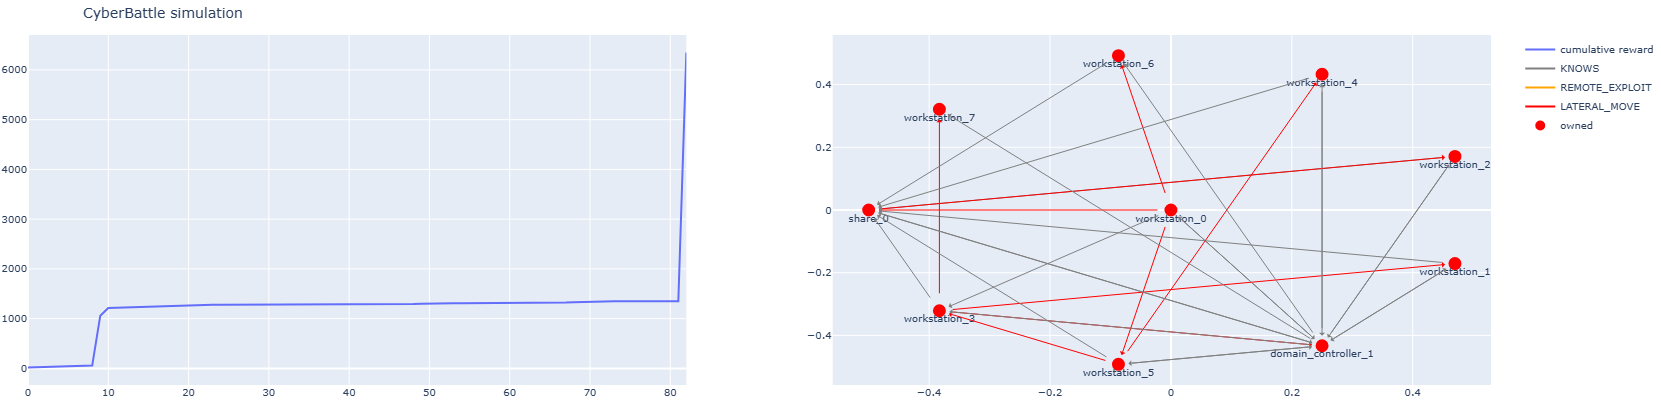

In [81]:
tiny = gym.make(f'ActiveDirectory-v{ngyms}')
current_o = tiny.reset()
tiny.seed(1)
wrapped_env = AgentWrapper(tiny, ActionTrackingStateAugmentation(ep, current_o))
# Use the trained agent to run the steps one by one
max_steps = 1000
# next action suggested by DQL agent
# h = []
for i in range(max_steps):
    # run the suggested action
    _, next_action, _ = l.exploit(wrapped_env, current_o)
    # h.append((tiny.get_explored_network_node_properties_bitmap_as_numpy(current_o), next_action))
    if next_action is None:
        print("No more learned moves")
        break
    current_o, _, is_done, _ = wrapped_env.step(next_action)
    if is_done:
        print("Finished simulation")
        break
tiny.render()
